In [1]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np

In [84]:
# 读取路径，获得图片名称
file_path = os.path.join(os.getcwd(),r'F:\1\img test\TestDataset\Kvasir\images\img')
file_names = os.listdir(file_path)

In [85]:
print (file_path)
print (file_names)

F:\1\img test\TestDataset\Kvasir\images\img
['cju0u82z3cuma0835wlxrnrjv.png', 'cju15wdt3zla10801odjiw7sy.png', 'cju16ach3m1da0993r1dq3sn2.png', 'cju16whaj0e7n0855q7b6cjkm.png', 'cju17z0qongpa0993de4boim4.png', 'cju1amqw6p8pw0993d9gc5crl.png', 'cju1bm8063nmh07996rsjjemq.png', 'cju1c3218411b08014g9f6gig.png', 'cju1cbokpuiw70988j4lq1fpi.png', 'cju1cj3f0qi5n0993ut8f49rj.png', 'cju1cqc7n4gpy0855jt246k68.png', 'cju1ddr6p4k5z08780uuuzit2.png', 'cju1f8w0t65en0799m9oacq0q.png', 'cju1h89h6xbnx08352k2790o9.png', 'cju1hp9i2xu8e0988u2dazk7m.png', 'cju2hfqnmhisa0993gpleeldd.png', 'cju2hjrqcvi2j0801bx1i6gxg.png', 'cju2hos57llxm08359g92p6jj.png', 'cju2hqt33lmra0988fr5ijv8j.png', 'cju2lberzkdzm09938cl40pog.png', 'cju2mh8t6p07008350e01tx2a.png', 'cju2nnqrqzp580855z8mhzgd6.png', 'cju2np2k9zi3v079992ypxqkn.png', 'cju2omjpeqj5a0988pjdlb8l1.png', 'cju2osuru0ki00855txo0n3uu.png', 'cju2pag1f0s4r0878h52uq83s.png', 'cju2rga4psq9n09881z519xx0.png', 'cju2rmd2rsw9g09888hh1efu0.png', 'cju2rqo702wpx0855fn7d5cxh.png'

In [86]:
# 得到每张图片的路径
img_paths = []
for file_name in file_names:
    img_paths.append(os.path.join(file_path,file_name))
len(img_paths)

# for i in img_paths:
#     print(i)

100

In [87]:
# 读取彩图
# 读取每一张图片
img = np.zeros((len(file_names),288, 384, 3))
for i in range(len(file_names)):
    img0 = cv2.imread(img_paths[i],-1)
    img0 = cv2.resize(img0,(384,288))
    img0 = img0[...,::-1]
    img[i] = img0/255

(100, 288, 384, 3)


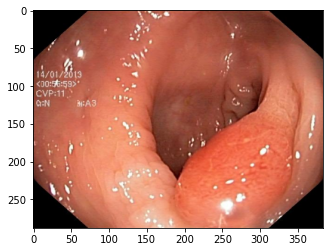

In [88]:
print(img.shape)
plt.imshow(img[1],'gray')

In [89]:
def rgb_cmy(img):
    r, g, b = cv2.split(img)  # split the channels
    # normalization [0,1]
    r = r / 255.0
    g = g / 255.0
    b = b / 255.0
    c = 1 - r
    m = 1 - g
    y = 1 - b
    result = cv2.merge((c, m, y))  # merge the channels
    return result

In [90]:
# 进行转换
imgcmy = np.zeros((len(file_names),288, 384, 3))
for i in range(len(file_names)):
    imgcmy[i] = rgb_cmy(img[i])

(100, 288, 384, 3)


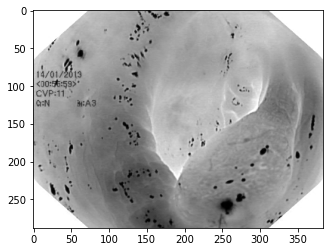

In [91]:
print(imgcmy.shape)
plt.imshow(imgcmy[1,:,:,1],'gray')

In [92]:
# masks
# 读取路径，获得图片名称
file_path = os.path.join(os.getcwd(),r'F:\1\img test\TestDataset\Kvasir\masks')
file_names = os.listdir(file_path)

In [93]:
# 得到每张图片的路径
masks_paths = []
for file_name in file_names:
    masks_paths.append(os.path.join(file_path,file_name))
len(masks_paths)

100

In [94]:
# 读取灰度图
# 读取每一张图片
masks = np.zeros((len(file_names),288, 384))
for i in range(len(file_names)):
    mask = cv2.imread(masks_paths[i],0)
    mask = cv2.resize(mask,(384,288))
    masks[i] = mask

(100, 288, 384, 3)


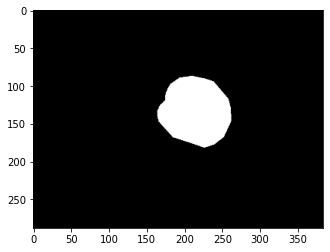

In [95]:
print(img.shape)
plt.imshow(masks[20],'gray')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x26c043b84a8>)

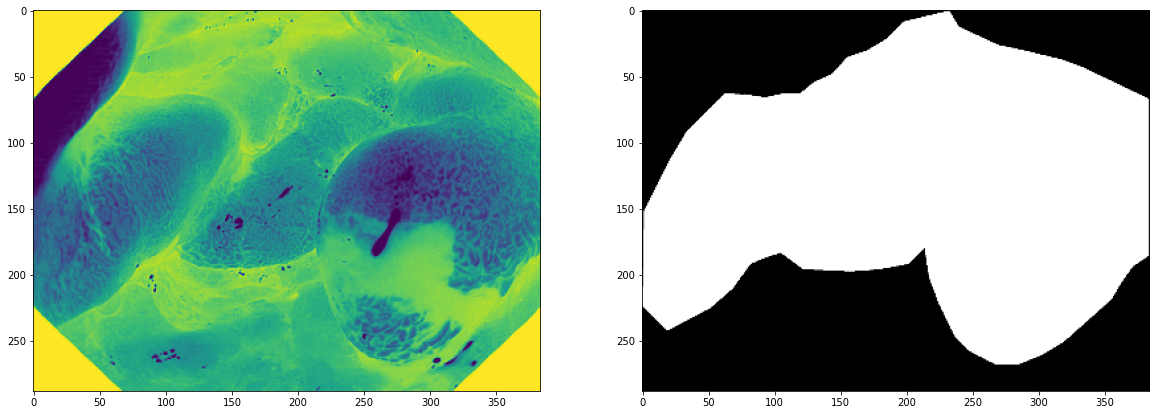

In [96]:
a = 99

plt.figure(figsize=(20, 20))
plt.subplot(121),plt.imshow(imgcmy[a,:,:,1])
plt.subplot(122),plt.imshow(masks[a],'gray')
# plt.axis('off')

In [97]:
# 保存为h5文件
import time
from tqdm import trange
import h5py
for i in trange(5):
    f = h5py.File(r'F:\1\img test\TestDataset\Kvasir\test_Kvasir_imgCMYandmasks.h5', 'w')
    f.create_dataset('imgCMY', data=imgcmy)
    f.create_dataset('masks', data=masks)
    f.close()
    time.sleep(0.5)
print("恭喜，运行完成，无bug")

100%|██████████| 5/5 [00:06<00:00,  1.21s/it]

恭喜，运行完成，无bug
